<h3>Load the data, taking the first sample</h3>

In [119]:
import pandas as pd
import numpy as np
import pylab as plt
from IPython.display import display

In [120]:
df = pd.DataFrame.from_csv('mzMATCHoutput.txt',sep='\t');
mass = df.index.tolist()
rt = df['RT'].tolist()
intensity = df['T0R1L'].tolist()
rid = df['relation.id'].tolist()

<h3>Group fragments if they are within tol ppm of each other</h3>

In [121]:
unique_masses = []
mass_id = []
tol = 5
for m in mass:
    # check for previous
    previous_pos = [i for i,a in enumerate(unique_masses) if (abs(m-a)/m)*1e6 < tol]
    if len(previous_pos) == 0:
        # it's a new one
        unique_masses.append(m)
        mass_id.append(len(unique_masses)-1)
    else:
        # it's an old one
        mass_id.append(previous_pos[0])

In [122]:
str(unique_masses[mass_id[0]])

'298.064219578'

In [123]:
# create some dummy MS1 peaklist
ms1_peakids = list(set(rid))
ms1_peakdata = []
for pid in ms1_peakids:
    ms1_peakdata.append({'peakID': pid, 'MSnParentPeakID': 0, 'msLevel': 1, \
                         'rt': 0.0, 'mz': 300.0, 'intensity': 3.0E5})
ms1 = pd.DataFrame(ms1_peakdata, index=ms1_peakids)

# create the MS2 peaklist
n_peaks = len(mass)
pid = max(ms1_peakids)+1
ms2_peakids = []
ms2_peakdata = []
for n in range(n_peaks):
    ms2_peakdata.append({'peakID': pid, 'MSnParentPeakID': rid[n], 'msLevel': 2, \
                         'rt': rt[n], 'mz': mass[n], 'intensity': intensity[n], \
                         'fragment_bin_id': str(unique_masses[mass_id[n]]), \
                         'loss_bin_id': np.nan})
    ms2_peakids.append(pid)
    pid += 1
ms2 = pd.DataFrame(ms2_peakdata, index=ms2_peakids)

display(ms1)
display(ms2)

,MSnParentPeakID,intensity,msLevel,mz,peakID,rt
0,0,300000,1,300,0,0
1,0,300000,1,300,1,0
2,0,300000,1,300,2,0
3,0,300000,1,300,3,0
4,0,300000,1,300,4,0
5,0,300000,1,300,5,0
6,0,300000,1,300,6,0
7,0,300000,1,300,7,0
8,0,300000,1,300,8,0
9,0,300000,1,300,9,0


,MSnParentPeakID,fragment_bin_id,intensity,loss_bin_id,msLevel,mz,peakID,rt
2272,0,298.064219578,1.881409e+10,NaN,2,298.064220,2272,548.159313
2273,0,299.064930969,4.303661e+09,NaN,2,299.064931,2273,548.091747
2274,0,300.060738234,1.833792e+09,NaN,2,300.060738,2274,548.035557
2275,0,224.045373829,1.426071e+09,NaN,2,224.045374,2275,548.136810
2276,0,282.03298931,1.501998e+09,NaN,2,282.032989,2276,548.159374
2277,0,313.08769602,1.292609e+09,NaN,2,313.087696,2277,548.159439
2278,0,209.993315704,1.177044e+09,NaN,2,209.993316,2278,548.215691
2279,0,189.993766131,8.376174e+08,NaN,2,189.993766,2279,548.148125
2280,0,191.973062121,5.550214e+08,NaN,2,191.973062,2280,548.136814
2281,0,150.026639274,3.739324e+08,NaN,2,150.026639,2281,548.159443


In [124]:
assert len(mass_id)==len(mass)

<h3>Create the data matrix and then trim to get rid of rare fragments, and dodgy data items</h3>

In [125]:
dmat = np.zeros((len(unique_masses),max(rid)+1),np.float)
for i,m in enumerate(mass):
    dmat[mass_id[i],rid[i]] = intensity[i]
    
    
    
min_met = 2
r,c = dmat.shape
remove = []
col_names = np.array(range(max(rid)+1))
row_names = np.array(unique_masses)
for i in range(r):
    s = np.where(dmat[i,:]>0)[0]
    if len(s)<min_met:
        remove.append(i)

remove = np.array(remove)
row_names = np.delete(row_names,remove)
dmat = np.delete(dmat,remove,axis=0)
min_frag = 3
r,c = dmat.shape
remove = []
for i in range(c):
    s = np.where(dmat[:,i]>0)[0]
    if len(s)<min_frag:
        remove.append(i)
remove = np.array(remove)

col_names = np.delete(col_names,remove)
dmat = np.delete(dmat,remove,axis=1)

# Remove fragments that appear nowhere
remove = []
for i in range(r):
    s = np.where(dmat[i,:]>0)[0]
    if len(s) == 0:
        remove.append(i)

dmat = np.delete(dmat,remove,axis=0)
row_names = np.delete(row_names,remove)

print dmat.shape,row_names.shape,col_names.shape

(1239, 349) (1239,) (349,)


<h3>Turn into integer array with biggest peak in each spectra at 100</h3>

In [126]:
dmat_int = np.zeros(dmat.shape,np.int)
r,c = dmat.shape
for i in range(c):
    ma = dmat[:,i].max()
    dmat_int[:,i] = 100*dmat[:,i]/ma
    

<h3>Make into a Pandas Structure to export</h3>

In [127]:
row_names = ['fragment_' + str(x) for x in row_names]
col_names = ['300_0_' + str(x) for x in col_names] # mz_rt_peakid
print row_names
print col_names

['fragment_298.064219578', 'fragment_299.064930969', 'fragment_300.060738234', 'fragment_224.045373829', 'fragment_282.03298931', 'fragment_313.08769602', 'fragment_209.993315704', 'fragment_189.993766131', 'fragment_191.973062121', 'fragment_150.026639274', 'fragment_179.946394614', 'fragment_226.024701957', 'fragment_188.014525324', 'fragment_192.009432602', 'fragment_283.031915643', 'fragment_266.00171548', 'fragment_220.077138176', 'fragment_284.029755343', 'fragment_190.993234903', 'fragment_225.044848044', 'fragment_268.017167391', 'fragment_224.036398085', 'fragment_226.042315838', 'fragment_315.084066711', 'fragment_297.0564392', 'fragment_192.972472634', 'fragment_181.962087947', 'fragment_254.001617664', 'fragment_211.990222561', 'fragment_191.99048519', 'fragment_193.998395484', 'fragment_163.978155743', 'fragment_197.956994696', 'fragment_177.957395575', 'fragment_161.962464244', 'fragment_225.049586982', 'fragment_175.978120795', 'fragment_193.969894256', 'fragment_165.967

In [128]:
d = pd.DataFrame(dmat_int,index=row_names,columns = col_names)
d.to_csv('gcms_for_lda.csv')

<h3>Run LDA</h3>

In [129]:
print d.shape

(1239, 349)


In [130]:
d = d.transpose()

In [131]:
vocab = d.columns
print vocab

Index([u'fragment_298.064219578', u'fragment_299.064930969',
       u'fragment_300.060738234', u'fragment_224.045373829',
       u'fragment_282.03298931', u'fragment_313.08769602',
       u'fragment_209.993315704', u'fragment_189.993766131',
       u'fragment_191.973062121', u'fragment_150.026639274', 
       ...
       u'fragment_245.103023342', u'fragment_243.098653622',
       u'fragment_301.109889512', u'fragment_342.106777363',
       u'fragment_124.027364904', u'fragment_308.107193032',
       u'fragment_239.043439793', u'fragment_268.071766167',
       u'fragment_184.103233825', u'fragment_225.082094435'],
      dtype='object', length=1239)


In [132]:
display(d)

,fragment_298.064219578,fragment_299.064930969,fragment_300.060738234,fragment_224.045373829,fragment_282.03298931,fragment_313.08769602,fragment_209.993315704,fragment_189.993766131,fragment_191.973062121,fragment_150.026639274,...,fragment_245.103023342,fragment_243.098653622,fragment_301.109889512,fragment_342.106777363,fragment_124.027364904,fragment_308.107193032,fragment_239.043439793,fragment_268.071766167,fragment_184.103233825,fragment_225.082094435
300_0_0,100,22,9,7,7,6,6,4,2,1,...,0,0,0,0,0,0,0,0,0,0
300_0_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300_0_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300_0_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300_0_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300_0_10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300_0_11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300_0_12,0,0,0,0,0,0,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300_0_14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300_0_15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
basedir = '../'
sys.path.append(basedir)
from lda_cgs import CollapseGibbsLda

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
n_topics = 150
alpha = 50.0/n_topics
beta = 0.1
n_samples = 200
n_burn = 0
n_thin = 1

In [135]:
n_row, n_col = d.shape
d.columns = range(n_col)

In [136]:
model = CollapseGibbsLda(d, vocab, n_topics, alpha, beta)
model.run(n_burn, n_samples, n_thin)

CGS LDA initialising
...................................
Using Numba for LDA sampling
Preparing words
Preparing Z matrix
DONE
Sample 1   Log joint likelihood = -818992.800 
Sample 2   Log joint likelihood = -519651.500 
Sample 3   Log joint likelihood = -394063.338 
Sample 4   Log joint likelihood = -354197.210 
Sample 5   Log joint likelihood = -339714.070 
Sample 6   Log joint likelihood = -332080.282 
Sample 7   Log joint likelihood = -327554.089 
Sample 8   Log joint likelihood = -323062.046 
Sample 9   Log joint likelihood = -320063.420 
Sample 10   Log joint likelihood = -317638.227 
Sample 11   Log joint likelihood = -316199.651 
Sample 12   Log joint likelihood = -314601.283 
Sample 13   Log joint likelihood = -313411.482 
Sample 14   Log joint likelihood = -312117.446 
Sample 15   Log joint likelihood = -310991.119 
Sample 16   Log joint likelihood = -310018.824 
Sample 17   Log joint likelihood = -308915.444 
Sample 18   Log joint likelihood = -308555.553 
Sample 19   Log joi

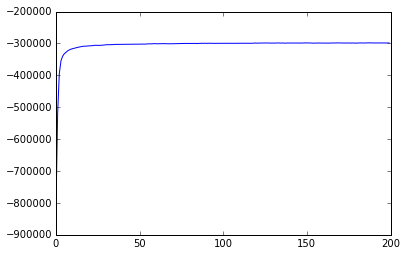

In [137]:
plt.plot(model.loglikelihoods_)

In [138]:
model.print_topic_words()

Topic 0: fragment_246.085238672 (0.435014350144),
Topic 1: fragment_150.034334708 (0.7106162044), fragment_166.047862999 (0.103975952999),
Topic 2: fragment_252.093254043 (0.220463409039), fragment_228.003841365 (0.158522596926), fragment_256.058750147 (0.108052305575), fragment_197.956994696 (0.089699472356), fragment_269.103205171 (0.0736407432897), fragment_150.017081142 (0.0621702225281),
Topic 3: fragment_189.100327838 (0.384591821106), fragment_115.081804723 (0.249808546485), fragment_159.071581975 (0.131873181192),
Topic 4: fragment_205.095355842 (0.604739907612), fragment_301.109889512 (0.0785298252661),
Topic 5: fragment_175.084844216 (0.49026627881), fragment_127.0818345 (0.100917431193),
Topic 6: fragment_289.135066157 (0.303096970723), fragment_427.195635736 (0.105093924522), fragment_152.077180433 (0.0915552546962), fragment_237.111770878 (0.081401252327), fragment_153.085055484 (0.0763242511423), fragment_225.12435056 (0.0678625825013), fragment_171.09004642 (0.0627855813